## Time Series Project

1. Explore the electricity dataset, using tools like line charts and decomposition
2. Forecast the first three days of February 2017 (72 hours) of electricity consumption for column `PowerConsumption_Zone1`, using the entire month of January 2017 to train your Model.
3. Fit both a Linear Regression model and Facebook Prophet. Compare their accuracy using plots of predicted vs. actual, as well as metrics like MAE and MAPE


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression


electricity_df = pd.read_csv(
    "powerconsumption.csv", 
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean()

electricity_df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


<Axes: xlabel='Datetime'>

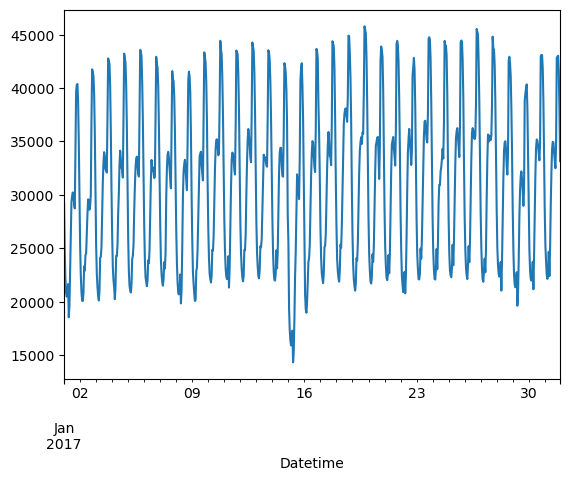

In [2]:
electricity_df.loc['2017-01-01':'2017-01-31','PowerConsumption_Zone1'].plot()

* there is a massive power drop on jan 15 i dont know why.

## Linear Regression

In [3]:
electricity_df = pd.read_csv(
    "powerconsumption.csv",
    usecols=["PowerConsumption_Zone1", "Datetime"],
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean().reset_index()

electricity_df.head()

,Datetime,PowerConsumption_Zone1
0,2017-01-01 00:00:00,29197.974683
1,2017-01-01 01:00:00,24657.215190
2,2017-01-01 02:00:00,22083.037973
3,2017-01-01 03:00:00,20811.139240
4,2017-01-01 04:00:00,20475.949367


<Axes: xlabel='Datetime'>

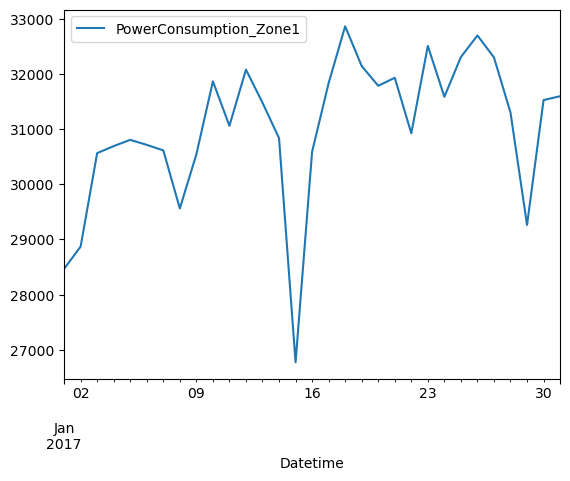

In [15]:
electricity_df.set_index('Datetime').loc[:'2017-01-31'].resample('D').mean().plot()

<Axes: xlabel='Datetime'>

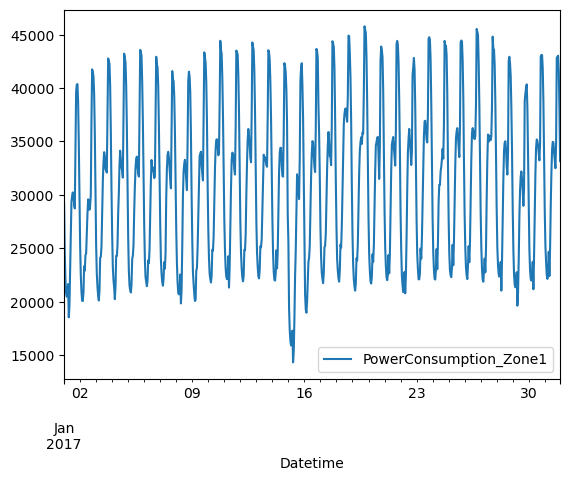

In [16]:
electricity_df.set_index('Datetime').loc[:'2017-01-31'].resample('H').mean().plot()


<Axes: xlabel='Datetime'>

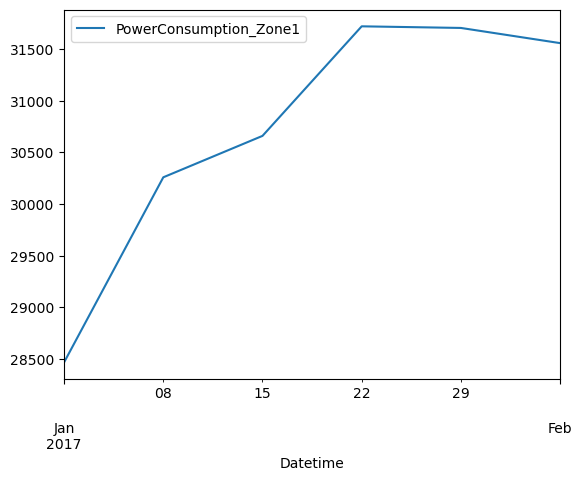

In [17]:
electricity_df.set_index('Datetime').loc[:'2017-01-31'].resample('W').mean().plot()


Linear Model 

In [18]:
electricity_df.head()

,Datetime,PowerConsumption_Zone1
0,2017-01-01 00:00:00,29197.974683
1,2017-01-01 01:00:00,24657.215190
2,2017-01-01 02:00:00,22083.037973
3,2017-01-01 03:00:00,20811.139240
4,2017-01-01 04:00:00,20475.949367


In [24]:
electricity_df['hour'] = electricity_df.Datetime.dt.hour.astype('string')
electricity_df['trend'] = electricity_df.index

In [26]:
electricity_df.head(10)

,Datetime,PowerConsumption_Zone1,hour,trend
0,2017-01-01 00:00:00,29197.974683,0,0
1,2017-01-01 01:00:00,24657.215190,1,1
2,2017-01-01 02:00:00,22083.037973,2,2
3,2017-01-01 03:00:00,20811.139240,3,3
4,2017-01-01 04:00:00,20475.949367,4,4
5,2017-01-01 05:00:00,20807.088607,5,5
6,2017-01-01 06:00:00,21648.607595,6,6
7,2017-01-01 07:00:00,18540.759495,7,7
8,2017-01-01 08:00:00,19605.063290,8,8
9,2017-01-01 09:00:00,22905.316455,9,9


In [28]:
model_prep = pd.get_dummies(electricity_df.set_index('Datetime'), drop_first=True, dtype ='int')

In [30]:
model_prep.shape


(8736, 25)

In [33]:
train_data = model_prep.loc[:'2017-01-31']
test_data = model_prep.loc['2017-02-01':'2017-02-03']

In [36]:
X = sm.add_constant(train_data.drop('PowerConsumption_Zone1', axis= 1))
y = train_data['PowerConsumption_Zone1']

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.951
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                     577.4
Date:                    Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                            08:06:41   Log-Likelihood:                -6558.4
No. Observations:                     744   AIC:                         1.317e+04
Df Residuals:                         719   BIC:                         1.328e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.634e+04    314.697     83.687      0.000    2.57e+04     2.7e+04
trend          2.7642      0.283      9.763      0.000       2.208       3.320
hour_1     -3371.1268    421.061     -8.006      0.000   -4197.783   -2544.471
hour_10     3722.1664    421.070      8.840      0.000    2895.492    4548.841
hour_11     5958.7162    421.072     14.151      0.000    5132.038    6785.394
hour_12     6754.9721    421.075     16.042      0.000    5928.290    7581.655
hour_13     6920.6359    421.077     16.436      0.000    6093.949    7747.323
hour_14     6197.7084    421.079     14.719      0.000    5371.016    7024.401
hour_15     5565.0054    421.082     13.216      0.000    4738.308    6391.703
hour_16     5048.1049    421.085     11.988      0.000    4221.401    5874.808
hour_17     8939.2729    421.088     21.229      0.000    8112.563    9765.983
hour_18      1.57e+04    421.092     37.293      0.000    1.49e+04    1.65e+04
hour_19     1.567e+04    421.095     37.206      0.000    1.48e+04    1.65e+04
hour_2     -5008.9746    421.061    -11.896      0.000   -5835.631   -4182.318
hour_20     1.541e+04    421.099     36.587      0.000    1.46e+04    1.62e+04
hour_21     1.365e+04    421.103     32.405      0.000    1.28e+04    1.45e+04
hour_22     1.012e+04    421.107     24.041      0.000    9297.105     1.1e+04
hour_23     4757.7226    421.111     11.298      0.000    3930.968    5584.477
hour_3     -5816.3121    421.062    -13.813      0.000   -6642.969   -4989.655
hour_4     -6086.6794    421.062    -14.456      0.000   -6913.338   -5260.021
hour_5     -5378.3288    421.063    -12.773      0.000   -6204.989   -4551.669
hour_6     -3451.3910    421.064     -8.197      0.000   -4278.053   -2624.729
hour_7     -4639.4880    421.065    -11.018      0.000   -5466.153   -3812.823
hour_8     -3015.4331    421.067     -7.161      0.000   -3842.101   -2188.765
hour_9       422.0968    421.069      1.002      0.316    -404.574    1248.768
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.209
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X_test = sm.add_constant(test_data.drop('PowerConsumption_Zone1', axis= 1))
y_test = test_data['PowerConsumption_Zone1']


In [39]:
prediction = model.predict(X_test)
prediction

Datetime
2017-02-01 00:00:00    28392.726555
2017-02-01 01:00:00    25024.363958
2017-02-01 02:00:00    23389.280250
2017-02-01 03:00:00    22584.706955
2017-02-01 04:00:00    22317.103852
                           ...     
2017-02-03 19:00:00    44245.259596
2017-02-03 20:00:00    43987.423744
2017-02-03 21:00:00    42229.285729
2017-02-03 22:00:00    38710.069722
2017-02-03 23:00:00    33346.705084
Length: 72, dtype: float64

In [40]:
mae(y_test, model.predict(X_test))

1016.8138495938302

In [41]:
mape(y_test, model.predict(X_test))

0.03272545074532694

# plot actual VS predict 

In [43]:
y_test.head()

Datetime
2017-02-01 00:00:00    28172.542372
2017-02-01 01:00:00    25288.474577
2017-02-01 02:00:00    23351.186440
2017-02-01 03:00:00    22359.661017
2017-02-01 04:00:00    22213.220338
Name: PowerConsumption_Zone1, dtype: float64

In [54]:
predictions = pd.DataFrame(pd.concat([y_test, prediction], axis = 1))
predictions.columns = ['actual', 'predict']
predictions.head()

,actual,predict
Datetime,,
2017-02-01 00:00:00,28172.542372,28392.726555
2017-02-01 01:00:00,25288.474577,25024.363958
2017-02-01 02:00:00,23351.186440,23389.280250
2017-02-01 03:00:00,22359.661017,22584.706955
2017-02-01 04:00:00,22213.220338,22317.103852


<Axes: xlabel='Datetime'>

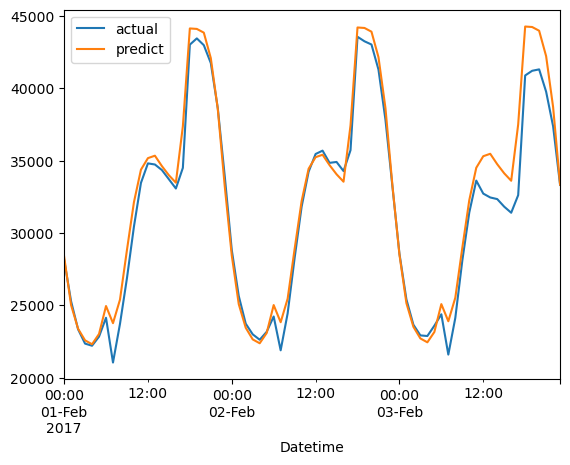

In [55]:
predictions.plot()

In [57]:
predictions['diff'] = predictions['actual'] - predictions['predict']
predictions['Percent_diff'] = predictions['diff'] /((predictions['actual'].mean())+(predictions['predict'].mean()))


In [58]:
predictions.head()


,actual,predict,diff,Percent_diff
Datetime,,,,
2017-02-01 00:00:00,28172.542372,28392.726555,-220.184183,-0.003468
2017-02-01 01:00:00,25288.474577,25024.363958,264.110619,0.004160
2017-02-01 02:00:00,23351.186440,23389.280250,-38.093810,-0.000600
2017-02-01 03:00:00,22359.661017,22584.706955,-225.045938,-0.003545
2017-02-01 04:00:00,22213.220338,22317.103852,-103.883514,-0.001636


# Predict Test Data

## Facebook Prophet

In [56]:
from prophet import Prophet


In [60]:
electricity_df.head()

,Datetime,PowerConsumption_Zone1,hour,trend
0,2017-01-01 00:00:00,29197.974683,0,0
1,2017-01-01 01:00:00,24657.215190,1,1
2,2017-01-01 02:00:00,22083.037973,2,2
3,2017-01-01 03:00:00,20811.139240,3,3
4,2017-01-01 04:00:00,20475.949367,4,4


In [62]:
electricity_df2 = electricity_df.drop(['hour', 'trend'], axis = 1)
electricity_df2.head()

,Datetime,PowerConsumption_Zone1
0,2017-01-01 00:00:00,29197.974683
1,2017-01-01 01:00:00,24657.215190
2,2017-01-01 02:00:00,22083.037973
3,2017-01-01 03:00:00,20811.139240
4,2017-01-01 04:00:00,20475.949367


In [66]:
prophet_train_data = electricity_df2.set_index('Datetime').loc[:'2017-01-31']
prophet_test_data = electricity_df2.set_index('Datetime').loc['2017-02-01':'2017-02-03']


In [67]:
prophet_test_data.tail()

,PowerConsumption_Zone1
Datetime,
2017-02-03 19:00:00,41218.983052
2017-02-03 20:00:00,41316.610170
2017-02-03 21:00:00,39773.898305
2017-02-03 22:00:00,37381.016948
2017-02-03 23:00:00,33327.457627


In [78]:
prophet_train_data.reset_index(inplace=True)


In [79]:
prophet_test_data.reset_index(inplace=True)

In [80]:
prophet_train_data.columns = ['ds', 'y']
prophet_test_data.columns = ['ds', 'y']

In [81]:
m = Prophet()
m.fit(prophet_train_data)

08:21:37 - cmdstanpy - INFO - Chain [1] start processing
08:21:38 - cmdstanpy - INFO - Chain [1] done processing


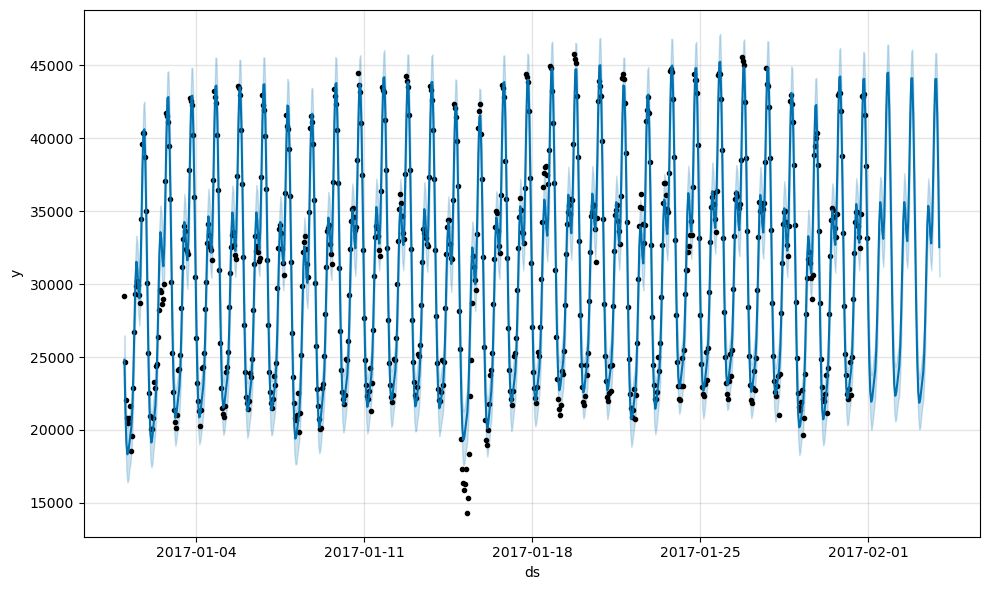

In [82]:
future = m.make_future_dataframe(periods = 72, freq= 'H')
forecast = m.predict(future)
m.plot(forecast);

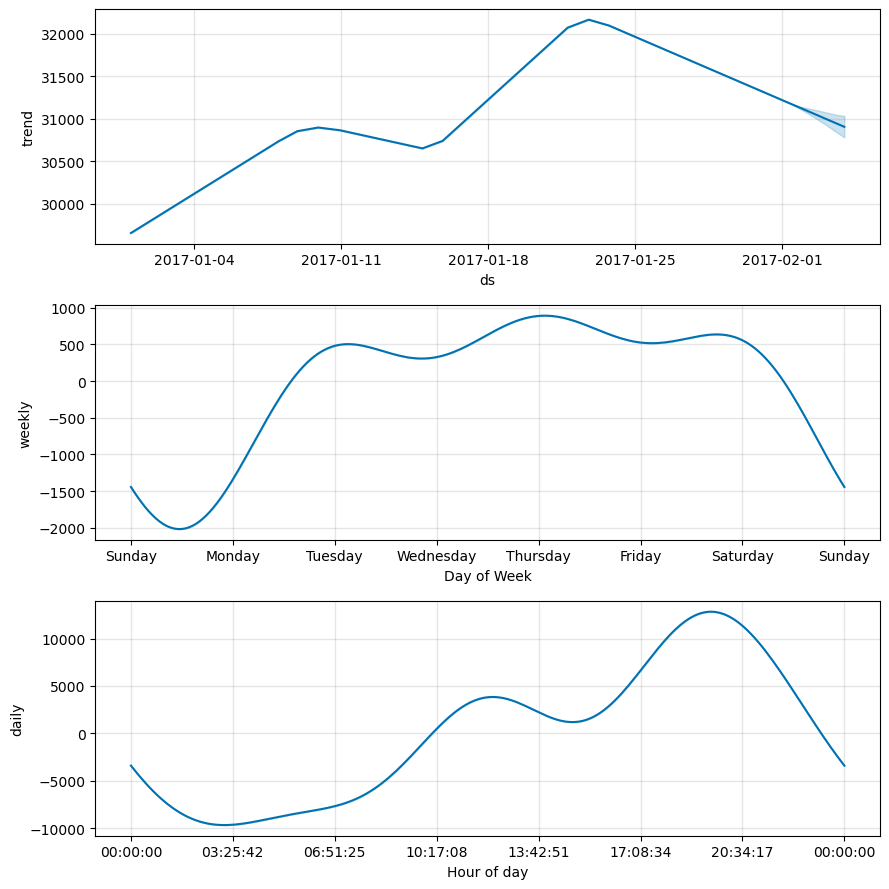

In [83]:
fig = m.plot_components(forecast);

In [84]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-01-01 00:00:00,24816.063544
1,2017-01-01 01:00:00,21292.912686
2,2017-01-01 02:00:00,19126.277344
3,2017-01-01 03:00:00,18331.494378
4,2017-01-01 04:00:00,18523.164301
...,...,...
811,2017-02-03 19:00:00,44027.158944
812,2017-02-03 20:00:00,44050.015856
813,2017-02-03 21:00:00,41537.832338
814,2017-02-03 22:00:00,37328.167628


In [87]:
plot_data = pd.DataFrame(m.predict(future)['yhat']).set_index(forecast.ds)
plot_data.tail(72)

,yhat
ds,
2017-02-01 00:00:00,28153.355625
2017-02-01 01:00:00,24721.155840
2017-02-01 02:00:00,22642.901401
2017-02-01 03:00:00,21933.101087
2017-02-01 04:00:00,22205.527418
...,...
2017-02-03 19:00:00,44027.158944
2017-02-03 20:00:00,44050.015856
2017-02-03 21:00:00,41537.832338


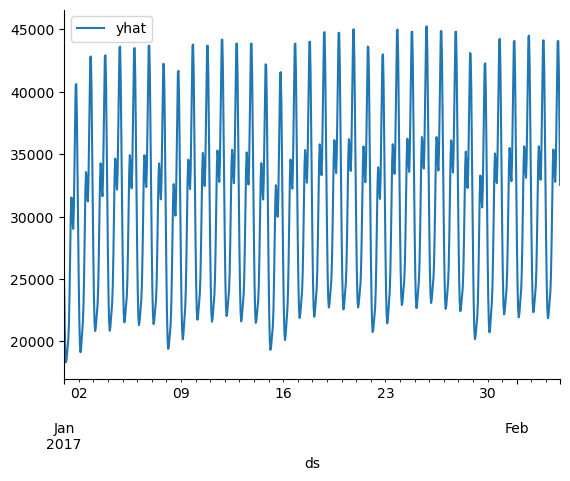

In [86]:
plot_data.plot()
sns.despine()

In [102]:
y = prophet_test_data

In [103]:
y.set_index('ds', inplace=True)

In [97]:
y_hat = plot_data.tail(72)

In [105]:
prophet_predictions = pd.concat([y,y_hat], axis =1)

<Axes: xlabel='ds'>

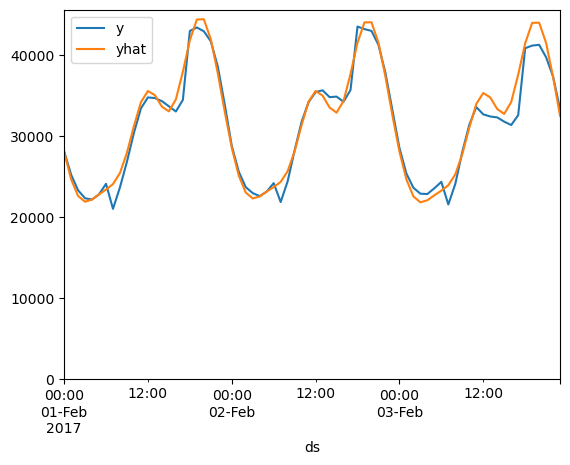

In [116]:
prophet_predictions.plot(ylim =0)

In [111]:
mae(prophet_test_data['y'], m.predict(future).iloc[-72:,-1])

1048.2012626534013

In [109]:
mape(prophet_test_data['y'], m.predict(future).iloc[-72:,-1])


0.03443975651059631

In [113]:
mae(y_test, model.predict(X_test))

1016.8138495938302

In [114]:
mape(y_test, model.predict(X_test))


0.03272545074532694